In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt


In [6]:
#load dataset
boston_dataset = load_boston()

C:\Users\Pavilion\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

In [5]:
#print keys
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [6]:
#EDA
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
#Loading the data in pandas dataframe
boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
#Adding the target variable 
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
#Getting the shape
print(boston.shape)

(506, 13)


In [10]:
#Checking for null values
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

C:\Users\Pavilion\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

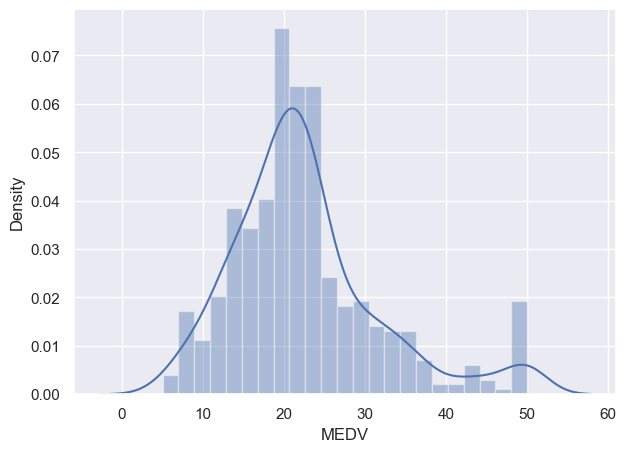

In [10]:
#Getting an idea about outliers in the target variables
import seaborn as sns
sns.set(rc = {'figure.figsize':(7,5)})
sns.distplot(boston['MEDV'])

In [12]:
#Removing outliers (after 39)
boston = boston[boston['MEDV'] < 40]

C:\Users\Pavilion\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

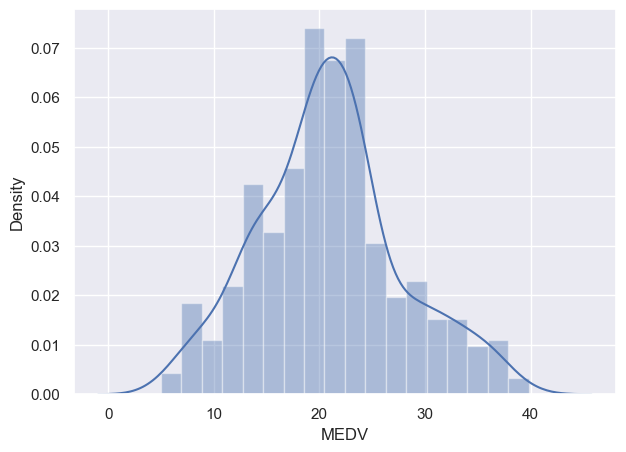

In [13]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(7,5)})
sns.distplot(boston['MEDV'])

<AxesSubplot:>

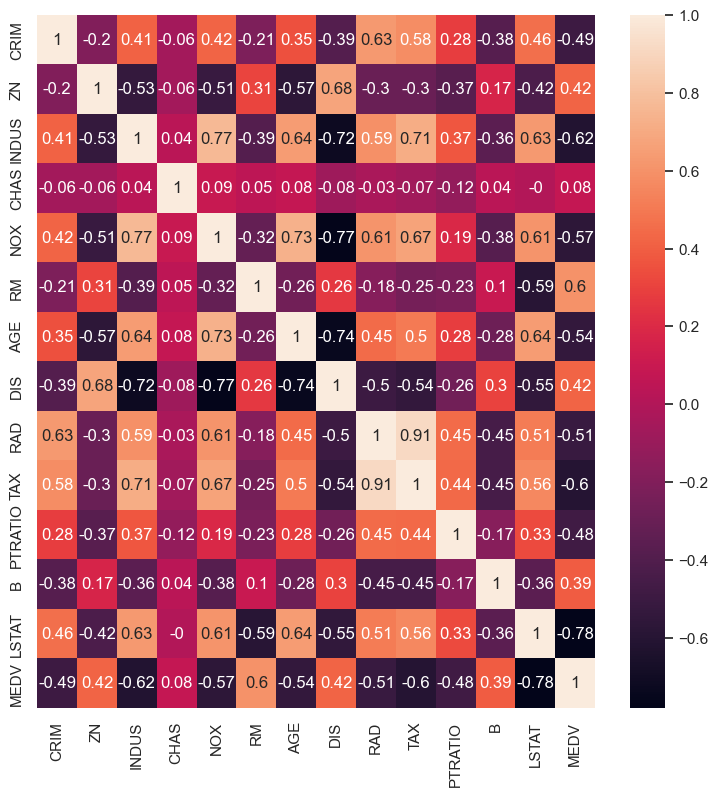

In [15]:
#Identifying Multi-Collinear Input Features
cm = boston.corr().round(2)
#Heatmap
sns.set(rc = {'figure.figsize':(9,9)})
sns.heatmap(cm, annot =True)

In [ ]:
#Identify the input features that have moderate to strong +ve/-ve correlation with TV
#Out of those input features, identify the feature having strongest relationship(LSTAT)
#Out of the remaining features in step1, identify input features which have correlationship with feature of step 2 and remove them

In [ ]:
# LSTAT as only input features

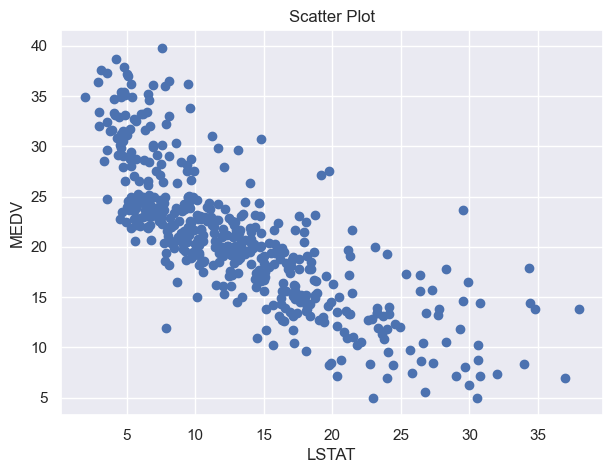

In [18]:
#Scatter plot
plt.figure(figsize = (7,5))
plt.scatter(boston['LSTAT'], boston['MEDV'], marker = 'o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Scatter Plot')
plt.show()

In [21]:
#Seperating input variables and output variable
X = boston['LSTAT']
y = boston['MEDV']

In [22]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [27]:
#Reshaping the data
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [28]:
#Creating Linear Regression Algorithm
lr = LinearRegression()

#Fitting the data
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
#Taking the predictions
y_pred = lr.predict(X_test)

In [31]:
#Evaluating the model
y_train_pred = lr.predict(X_train)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
r2 = metrics.r2_score(y_test,y_pred)
print('Training RMSE:', rmse)
print('Training R2 Score:', r2)

#Testing Evaluation
y_test_pred = lr.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2= metrics.r2_score(y_test, y_test_pred)
print('Training RMSE:', rmse)
print('Training R2 Score:', r2)

Training RMSE: 4.160439797383255
Training R2 Score: 0.6550517047911373
Training RMSE: 4.160439797383255
Training R2 Score: 0.6550517047911373
